## ***Visión por Computadora - 2024***
### *Lista 01 - Ejercicio 5*

Stefano Aragoni, Carol Arévalo, José González, Luis Santos

-----------


5. Implementar un algoritmo de segmentación para imágenes RGB, utilizando de fondo un algoritmo de k-medias. Se debe permitir al usuario elegir el parámetro k ≥ 2 del número de segmentos que desea obtener. Mostrar con varios ejemplos (buenos y malos) los alcances y limitaciones de este algoritmo. Para cada caso, mostrar

    - la imagen original
    - el mapa de segmentos o clases
    - la imagen cuantizada (promedio de color en cada segmento).


Referencias:

- https://www.kdnuggets.com/2019/08/introduction-image-segmentation-k-means-clustering.html
- https://www.geeksforgeeks.org/image-segmentation-using-k-means-clustering/
- https://medium.com/swlh/image-segmentation-using-k-means-clustering-46a60488ae71
- https://www.sciencedirect.com/science/article/pii/S1877050915014143
- https://medium.com/mlearning-ai/k-means-clustering-71a875dbce3c

____
#### *Importar librerías*

Como primer paso, se importa numpy, cv2, y matplotlib.

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

#### *Definición de parámetros*

Posteriormente, se le pregunta al usuario la cantidad de clusters (K) que desea utilizar para la segmentación de la imagen. Asimismo, se define la ubicación de las distintas imágenes a probar.

In [2]:
def input_K_value():
    
    while True:

        try:
            K = int(input("Valor de K (K >= 2) a utilizar: "))

            if K < 2:
                print("Por favor ingrese un valor de K mayor o igual a 2")
            else:
                break

        except ValueError:
            print("Por favor ingrese un valor de K mayor o igual a 2")

    return K

In [3]:
# Leer las imágenes de la carpeta imgs
img_arbol = cv2.imread("imgs/arbol.jpg")
img_moneda = cv2.imread("imgs/moneda.jpg")
img_colorblind = cv2.imread("imgs/color-blind.jpeg")
img_selva = cv2.imread("imgs/selva.jpg")

# Solicitar el valor de K
k = input_K_value()

#### *Conversión de imágen a formato RGB*

Se utiliza CV2.COLOR_BGR2RGB para convertir la imagen a formato RGB. Esto se hace para que la imagen pueda ser leída por el algoritmo de K-Means nativo de OpenCV.

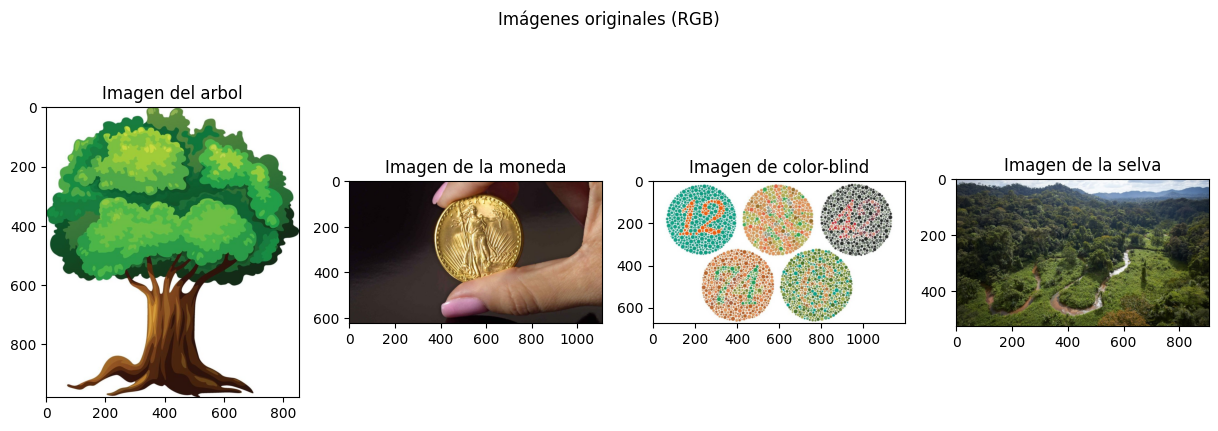

In [4]:
# Convertir las imágenes a RGB
    # Originalmente las imágenes están en BGR
img_arbol_rgb = cv2.cvtColor(img_arbol, cv2.COLOR_BGR2RGB)
img_moneda_rgb = cv2.cvtColor(img_moneda, cv2.COLOR_BGR2RGB)
img_colorblind_rgb = cv2.cvtColor(img_colorblind, cv2.COLOR_BGR2RGB)
img_selva_rgb = cv2.cvtColor(img_selva, cv2.COLOR_BGR2RGB)


# Mostrar las imágenes
fig, axs = plt.subplots(1, 4, figsize=(15, 5))
fig.suptitle("Imágenes originales (RGB)")
axs[0].imshow(img_arbol_rgb)
axs[0].set_title("Imagen del arbol")
axs[1].imshow(img_moneda_rgb)
axs[1].set_title("Imagen de la moneda")
axs[2].imshow(img_colorblind_rgb)
axs[2].set_title("Imagen de color-blind")
axs[3].imshow(img_selva_rgb)
axs[3].set_title("Imagen de la selva")
plt.show()

#### *Reformatear imágenes*

El siguiente paso es transformar las matrices de las imágenes a un formato que pueda ser leído por el algoritmo de K-Means. Para ello, se reformatean las matrices de las imágenes a un formato de 2 dimensiones, donde cada fila representa un pixel de la imagen, y cada columna representa un canal de color (R, G, B).


Asimismo, se cambia el tipo de dato de las matrices de las imágenes a float32, para que puedan ser leídas por el algoritmo de K-Means.

In [5]:
# Reformatear las imágenes para que sean de 2 dimensiones
img_arbol_rgb_2d = img_arbol_rgb.reshape((-1, 3))
img_moneda_rgb_2d = img_moneda_rgb.reshape((-1, 3))
img_colorblind_rgb_2d = img_colorblind_rgb.reshape((-1, 3))
img_selva_rgb_2d = img_selva_rgb.reshape((-1, 3))

# Convertir las imágenes a float32
img_arbol_rgb_2d = np.float32(img_arbol_rgb_2d)
img_moneda_rgb_2d = np.float32(img_moneda_rgb_2d)
img_colorblind_rgb_2d = np.float32(img_colorblind_rgb_2d)
img_selva_rgb_2d = np.float32(img_selva_rgb_2d)

#### *K-Means para segmentación de imágenes*

Posteriormente, se definen los criterios de CV2 para llevar a cabo la segmentación con K-Means. 

In [6]:
# Definir los criterios
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

# Aplicar el algoritmo de K-Means
ret_arbol, label_arbol, center_arbol = cv2.kmeans(img_arbol_rgb_2d, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
ret_moneda, label_moneda, center_moneda = cv2.kmeans(img_moneda_rgb_2d, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
ret_colorblind, label_colorblind, center_colorblind = cv2.kmeans(img_colorblind_rgb_2d, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
ret_selva, label_selva, center_selva = cv2.kmeans(img_selva_rgb_2d, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

Luego de aplicar K-Means, es necesario regresar los float32 a uint8 para que puedan ser leídos por CV2 nuevamente. Asimismo, se asignan los colores de los clusters a cada pixel de la imagen, y se reformatea la imagen a su tamaño original.

In [7]:
# Convertir los centros a uint8
center_arbol = np.uint8(center_arbol)
center_moneda = np.uint8(center_moneda)
center_colorblind = np.uint8(center_colorblind)
center_selva = np.uint8(center_selva)

# Se asigna a cada pixel la etiqueta del centro más cercano
res_arbol = center_arbol[label_arbol.flatten()]
res_moneda = center_moneda[label_moneda.flatten()]
res_colorblind = center_colorblind[label_colorblind.flatten()]
res_selva = center_selva[label_selva.flatten()]

# Reformatear las imágenes a su tamaño y forma original
label_arbol_3d = res_arbol.reshape((img_arbol.shape))
label_moneda_3d = res_moneda.reshape((img_moneda.shape))
label_colorblind_3d = res_colorblind.reshape((img_colorblind.shape))
label_selva_3d = res_selva.reshape((img_selva.shape))

#### *Resultados finales*

Finalmente, se puede mostrar la imagen final, el mapa de segmentos, y la imagen cuantizada.

In [28]:
def show_result(original, center, res, label):

    fig, axs = plt.subplots(1, 4, figsize=(20, 5))
    fig.suptitle("K = " + str(k))

    axs[0].imshow(original)
    axs[0].set_title("Imagen Original")

    label_3d = label.reshape(original.shape[0], original.shape[1])
    axs[1].imshow(label_3d, cmap='viridis')
    axs[1].set_title("Mapa de Segmentos")

    axs[2].imshow(center.reshape((1, -1, 3)))
    axs[2].set_title("Colores principales (promedio)")

    axs[3].imshow(res)
    axs[3].set_title("Imagen cuantizada")

    plt.show()

En el primer ejemplo, el algoritmo de K-Means logra segmentar la imagen de manera correcta. Como se puede observar en la imagen final, el algoritmo logra identificar el arbol completo.

Este ejemplo es relativamente sencillo, especialmente considerando que el fondo es blanco. Por tal motivo, el algoritmo logra identificar el arbol sin problemas.

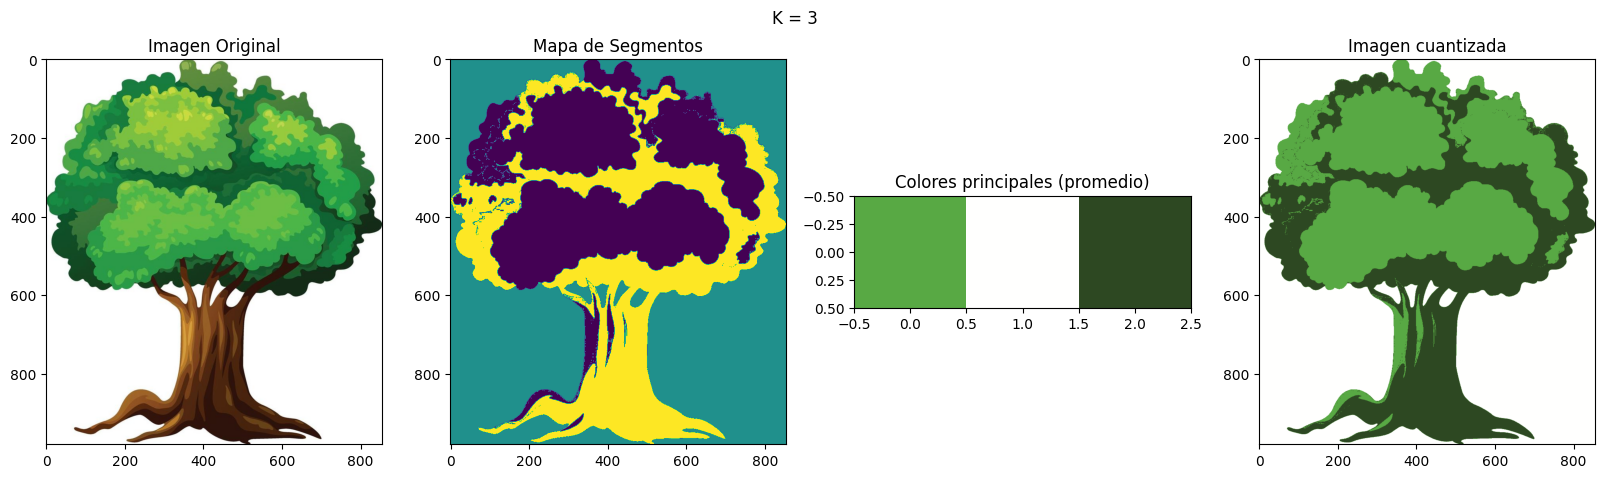

In [29]:
show_result(img_arbol_rgb, center_arbol, label_arbol_3d, label_arbol)

En este segundo ejemplo, se puede observar que el algoritmo de K-Means es capaz de separar el fondo de la imagen de los objetos que se encuentran en primer plano. Dependiendo de la cantidad de clusters que se utilicen, se puede obtener una segmentación más o menos precisa.

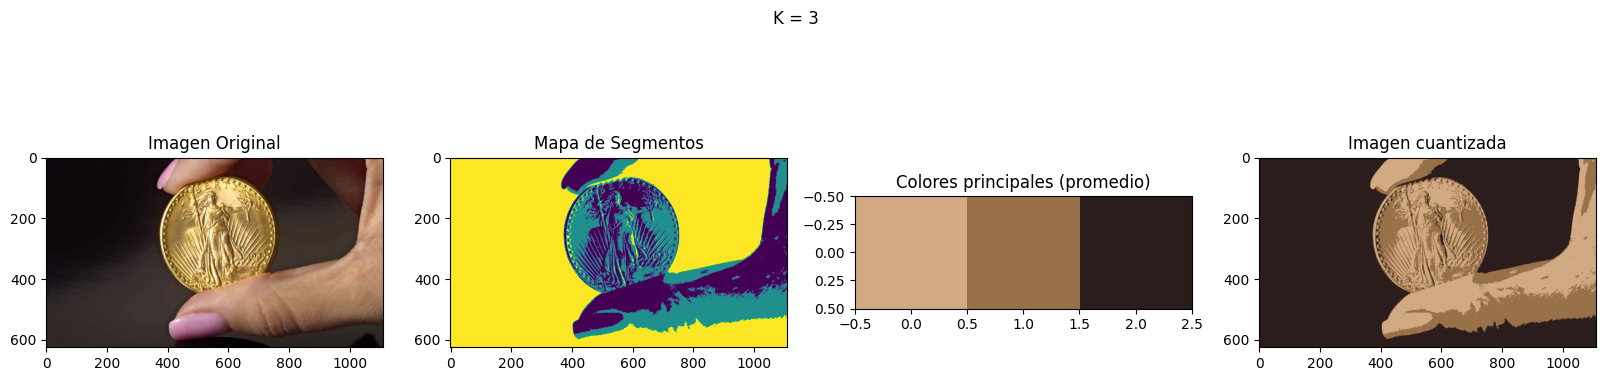

In [30]:
show_result(img_moneda_rgb, center_moneda, label_moneda_3d, label_moneda)

En la prueba de colorblindness, se puede observar como el algoritmo detecta los circulos de puntitos. Sin embargo, si se utiliza K=2, el algoritmo no es capaz de distinguir entre las ligeras variaciones de color en los puntitos. Como resultado, no se logra identificar los números en la imágen segmentada.

Por otro lado, si se utiliza K=3, el algoritmo es capaz de distinguir entre las ligeras variaciones de color entre ciertos puntitos (NO todos). Como resultado, se logra identificar los números en la imágen segmentada, excepto en los casos donde los colores originales de los puntitos son muy similares. **Este es un caso donde el algoritmo no funciona de forma óptima cuando se utiliza un K bajo.**

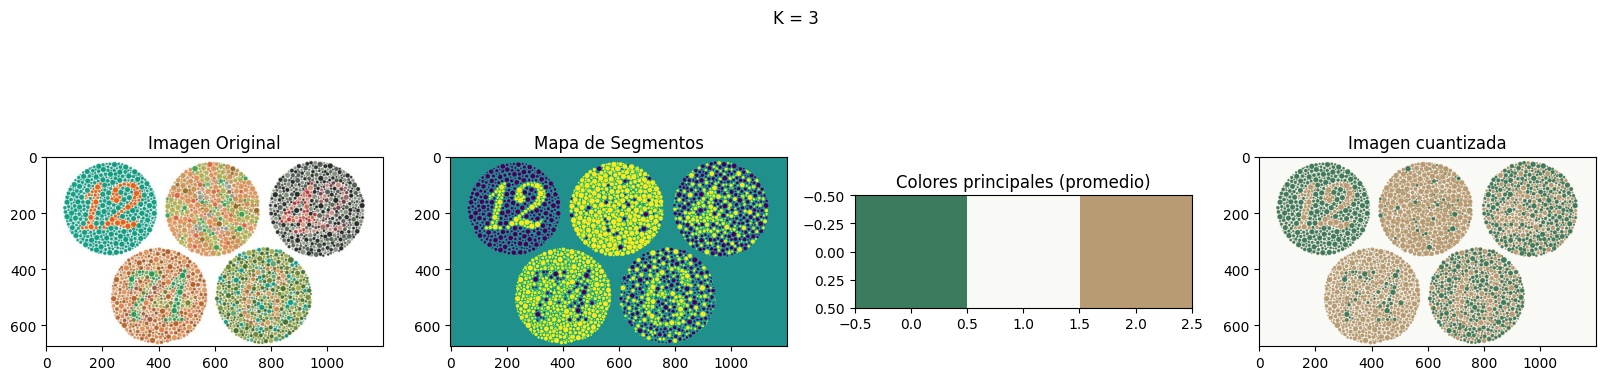

In [31]:
show_result(img_colorblind_rgb, center_colorblind, label_colorblind_3d, label_colorblind)

En la última imágen de la selva, con K=2 únicamente se puede distinguir la selva del cielo y río. Sin embargo, no se logra distinguir entre los distintos tipos de árboles. 
Asimismo, cabe destacar que las montañas del fondo, que tienen una tonalidad celeste, se pierden en la segmentación.

En conclusión, el algoritmo de K-Means es capaz de segmentar imágenes RGB de manera correcta, siempre y cuando se utilice un número adecuado de clusters. De no utilizar un K apropiado, el algoritmo no es capaz de distinguir entre colores muy similares y se pierde información en la segmentación.

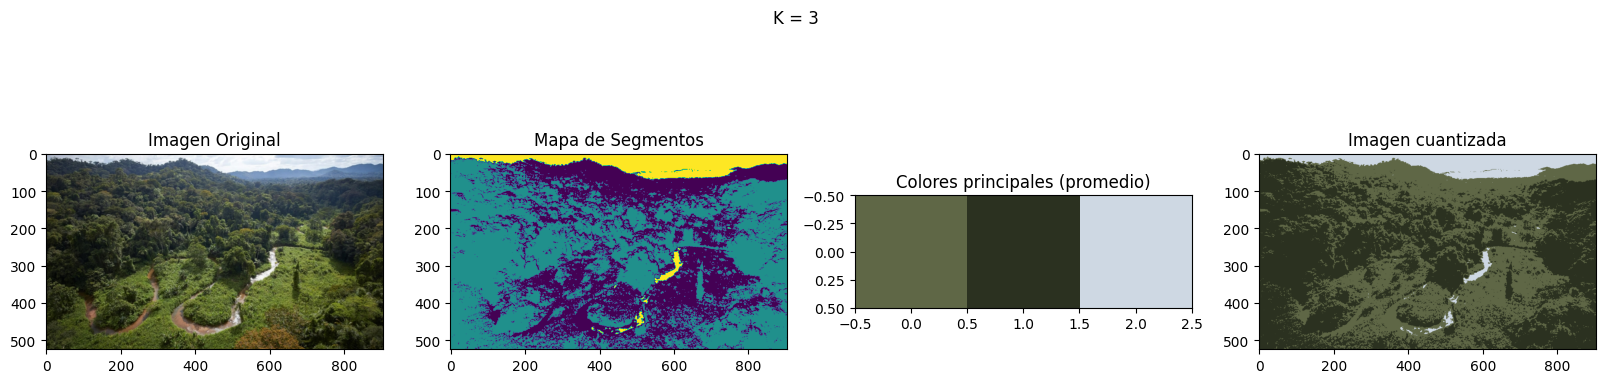

In [32]:
show_result(img_selva_rgb, center_selva, label_selva_3d, label_selva)

En conclusión, este algoritmo es sumamente útil para segmentar imágenes. Dependiendo de la cantidad de clusters que se utilicen, se puede obtener una segmentación más o menos precisa. Sin embargo, cabe destacar que una segmentación muy precisa puede requerir un K muy alto, lo cual puede ser computacionalmente costoso. Por tal motivo, es importante encontrar un balance entre la precisión de la segmentación y el costo computacional del algoritmo.

A través de los ejemplos anteriores, se puede observar que el algoritmo de K-Means es capaz de segmentar imágenes RGB de manera correcta. Sin embargo, puede tener problemas cuando hay muchos colores similares en la imagen y se utilizan pocos clusters.